In [32]:
from pycoingecko import CoinGeckoAPI
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

import sklearn.cluster as cluster
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.mixture import GaussianMixture
from collections import Counter
import datetime

In [2]:
cg = CoinGeckoAPI()

In [3]:
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

##### Dataframe with cg.get_coins_markets info

In [4]:
output = pd.DataFrame()
for j in range(1 , 7):
    pages = cg.get_coins_markets(vs_currency='usd', page=int(j) , timeout = 30)
    for i in pages:
        output = output.append(i , ignore_index=True)

In [5]:
output

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,37957.000000,7.193105e+11,1.0,797374656977.0,1.366880e+10,38782.000000,...,21000000.0,21000000.0,69045.000000,-44.98665,2021-11-10T14:24:11.849Z,67.810000,55915.92939,2013-07-06T00:00:00.000Z,None,2022-01-30T13:17:23.072Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2616.660000,3.127159e+11,2.0,None,1.018118e+10,2647.060000,...,None,None,4878.260000,-46.25948,2021-11-10T14:24:19.604Z,0.432979,605380.48902,2015-10-20T00:00:00.000Z,"{'times': 91.19147339187138, 'currency': 'btc'...",2022-01-30T13:18:52.857Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.000000,7.821350e+10,3.0,None,3.255319e+10,1.020000,...,78117427985.935806,None,1.320000,-24.36027,2018-07-24T00:00:00.000Z,0.572521,74.80333,2015-03-02T00:00:00.000Z,None,2022-01-30T13:16:53.799Z
3,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,384.460000,6.471047e+10,4.0,64710472156,1.060064e+09,396.900000,...,168137035.9,168137035.9,686.310000,-43.88485,2021-05-10T07:24:17.097Z,0.039818,967113.02109,2017-10-19T00:00:00.000Z,None,2022-01-30T13:17:47.101Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1.000000,4.976227e+10,5.0,None,2.099857e+09,1.010000,...,49772460407.793602,None,1.170000,-14.71833,2019-05-08T00:40:28.300Z,0.891848,12.13833,2021-05-19T13:14:05.611Z,None,2022-01-30T13:17:48.653Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,marcopolo,map,MAP Protocol,https://assets.coingecko.com/coins/images/1008...,0.021221,4.708358e+07,596.0,None,7.995650e+05,0.021525,...,10000000000.0,None,0.272627,-92.24441,2021-04-09T11:14:52.736Z,0.010705,97.51020,2021-07-20T03:20:09.308Z,None,2022-01-30T13:17:59.872Z
596,fio-protocol,fio,FIO Protocol,https://assets.coingecko.com/coins/images/1182...,0.099717,4.708196e+07,597.0,None,1.374467e+06,0.102101,...,1000000000.0,None,0.560433,-82.18441,2021-04-06T06:59:51.642Z,0.057934,72.34092,2021-01-05T00:21:34.775Z,None,2022-01-30T13:18:19.882Z
597,bytom,btm,Bytom,https://assets.coingecko.com/coins/images/1087...,0.026825,4.669146e+07,598.0,None,2.329683e+06,0.027781,...,2100000000.0,None,1.160000,-97.68489,2018-04-24T00:19:42.640Z,0.024033,12.15611,2022-01-24T10:26:04.316Z,"{'times': -0.4634931174343452, 'currency': 'us...",2022-01-30T13:19:23.959Z
598,ampleforth-governance-token,forth,Ampleforth Governance Token,https://assets.coingecko.com/coins/images/1491...,5.370000,4.661238e+07,599.0,80740137,2.570132e+06,5.480000,...,14998897.144559,14998897.144559,180.470000,-97.00086,2021-04-21T16:13:43.320Z,4.470000,21.06011,2022-01-24T12:50:07.304Z,None,2022-01-30T13:19:22.321Z


##### Keep only the information that we want

In [6]:
output = output[['id' , 'name' , 'market_cap' , 'total_supply' , 'circulating_supply' , 'price_change_percentage_24h']]

In [7]:
#output = pd.read_csv('marketcap_.csv')

##### Search for twitter followers with cg.get_coin_by_id

time.sleep stops your script from running for certain amount of seconds, while the timeout is the maximum time wait for retrieving the url. If the data is retrieved before the timeout time is up, the remaining time will get skipped. So it's possible to take less than 10 seconds using timeout.

In [8]:
data=[]
for i in range(600):
    time.sleep(random.randint(1,2))
    a = cg.get_coin_by_id(id=str(output['id'][i]))
    data.append([output['id'][i] , a['community_data']['twitter_followers']])
df = pd.DataFrame(data, columns=['id', 'twitter_followers'])  

##### Merge the df and output Dataframes

In [9]:
alldata = pd.concat([output, df], axis=1, join="inner")
alldata

,id,name,market_cap,total_supply,circulating_supply,price_change_percentage_24h,id,twitter_followers
0,bitcoin,Bitcoin,7.193105e+11,21000000.0,1.894407e+07,0.31503,bitcoin,4488568
1,ethereum,Ethereum,3.127159e+11,None,1.193736e+08,1.79747,ethereum,2168829
2,tether,Tether,7.821350e+10,78117427985.935806,7.811743e+10,0.08377,tether,202134
3,binancecoin,Binance Coin,6.471047e+10,168137035.9,1.681370e+08,-2.08075,binancecoin,7466184
4,usd-coin,USD Coin,4.976227e+10,49772460407.793602,4.977246e+10,0.01212,usd-coin,0
...,...,...,...,...,...,...,...,...
595,marcopolo,MAP Protocol,4.708358e+07,10000000000.0,2.228621e+09,1.78105,marcopolo,80466
596,fio-protocol,FIO Protocol,4.708196e+07,1000000000.0,4.712422e+08,0.93126,fio-protocol,80800
597,bytom,Bytom,4.669146e+07,2100000000.0,1.731557e+09,-0.50908,bytom,29799
598,ampleforth-governance-token,Ampleforth Governance Token,4.661238e+07,14998897.144559,8.659067e+06,1.03514,ampleforth-governance-token,36326


## Preprocess

##### New names to columns

In [11]:
alldata.columns = ['id', 'name', 'market_cap' , 'total_supply' , 'circulating_supply' , 'price_change_percentage_24h' ,'id1' , 'twitter_followers'] 

In [12]:
alldata.drop(['id1'], axis=1, inplace=True)

In [13]:
alldata.head()

,id,name,market_cap,total_supply,circulating_supply,price_change_percentage_24h,twitter_followers
0,bitcoin,Bitcoin,7.193105e+11,21000000.0,1.894407e+07,0.31503,4488568
1,ethereum,Ethereum,3.127159e+11,None,1.193736e+08,1.79747,2168829
2,tether,Tether,7.821350e+10,78117427985.935806,7.811743e+10,0.08377,202134
3,binancecoin,Binance Coin,6.471047e+10,168137035.9,1.681370e+08,-2.08075,7466184
4,usd-coin,USD Coin,4.976227e+10,49772460407.793602,4.977246e+10,0.01212,0


#### Check for duplicates

In [14]:
alldata[alldata[['id']].duplicated() == True]

,id,name,market_cap,total_supply,circulating_supply,price_change_percentage_24h,twitter_followers


In [15]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           600 non-null    object 
 1   name                         600 non-null    object 
 2   market_cap                   600 non-null    float64
 3   total_supply                 578 non-null    object 
 4   circulating_supply           600 non-null    float64
 5   price_change_percentage_24h  600 non-null    float64
 6   twitter_followers            600 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 32.9+ KB


In [16]:
alldata.isnull().sum()

id                              0
name                            0
market_cap                      0
total_supply                   22
circulating_supply              0
price_change_percentage_24h     0
twitter_followers               0
dtype: int64

#### Put the price of circulating_supply to total_supply when total_supply is nan

In [17]:
alldata['total_supply'] = np.where(alldata['total_supply'].isnull(), alldata['circulating_supply'], alldata['total_supply'])

#### Drop the rows with nan values in price_change_percentage_24h column

In [18]:
alldata.drop(alldata.index[alldata['price_change_percentage_24h'].isnull()], inplace = True)
alldata.shape

(600, 7)

---------------------------------------------------------------------------------------------------------

## Feature Engineering

##### Percentage circulating = (circulating_supply/total_supply)*100

In [19]:
alldata['circ_perc'] = (alldata['circulating_supply']/alldata['total_supply'])*100
alldata.isnull().sum()

id                             0
name                           0
market_cap                     0
total_supply                   0
circulating_supply             0
price_change_percentage_24h    0
twitter_followers              0
circ_perc                      0
dtype: int64

---------------------------------------------------------------------------------------------------------------------------------

#### Keep only these coins which they have circulating percentage bellow 100% because there are some wrong data to the site that we have scraped

In [20]:
alldata = alldata[alldata.circ_perc <=100]

In [21]:
alldata.head()

,id,name,market_cap,total_supply,circulating_supply,price_change_percentage_24h,twitter_followers,circ_perc
0,bitcoin,Bitcoin,7.193105e+11,21000000.0,1.894407e+07,0.31503,4488568,90.209848
1,ethereum,Ethereum,3.127159e+11,119373600.499,1.193736e+08,1.79747,2168829,100.0
2,tether,Tether,7.821350e+10,78117427985.935806,7.811743e+10,0.08377,202134,100.0
3,binancecoin,Binance Coin,6.471047e+10,168137035.9,1.681370e+08,-2.08075,7466184,100.0
4,usd-coin,USD Coin,4.976227e+10,49772460407.793602,4.977246e+10,0.01212,0,99.999991


#### Drop the coins Bitcoin, Etherium and Binance coin because there are outliers and after trials we saw that in clustering, a cluster will be created only with these three coins so we decided to see what results we will have without them.

In [22]:
alldata = alldata.drop([0, 1, 3])
alldata.shape

(582, 8)

#### New index 

In [24]:
new_index = [x for x in range(582)]
alldata.index = new_index
alldata

,id,name,market_cap,total_supply,circulating_supply,price_change_percentage_24h,twitter_followers,circ_perc
0,tether,Tether,7.821350e+10,78117427985.935806,7.811743e+10,0.08377,202134,100.0
1,usd-coin,USD Coin,4.976227e+10,49772460407.793602,4.977246e+10,0.01212,0,99.999991
2,cardano,Cardano,3.398182e+10,45000000000.0,3.206639e+10,-0.90667,809924,71.258646
3,solana,Solana,3.006585e+10,508180963.57,3.151006e+08,-1.41644,1395322,62.005583
4,ripple,XRP,2.948559e+10,100000000000.0,4.773692e+10,-0.11778,2395914,47.736918
...,...,...,...,...,...,...,...,...
577,marcopolo,MAP Protocol,4.708358e+07,10000000000.0,2.228621e+09,1.78105,80466,22.286212
578,fio-protocol,FIO Protocol,4.708196e+07,1000000000.0,4.712422e+08,0.93126,80800,47.124217
579,bytom,Bytom,4.669146e+07,2100000000.0,1.731557e+09,-0.50908,29799,82.455098
580,ampleforth-governance-token,Ampleforth Governance Token,4.661238e+07,14998897.144559,8.659067e+06,1.03514,36326,57.731355


#### Drop the two columns that we used them in feature engineering

In [25]:
alldata.drop(['total_supply' , 'circulating_supply'], axis=1, inplace=True)

#### Keep only numeric columns

In [26]:
new = alldata[['market_cap', 'price_change_percentage_24h', 'twitter_followers' , 'circ_perc']].copy()

In [27]:
new.head()

,market_cap,price_change_percentage_24h,twitter_followers,circ_perc
0,7.821350e+10,0.08377,202134,100.0
1,4.976227e+10,0.01212,0,99.999991
2,3.398182e+10,-0.90667,809924,71.258646
3,3.006585e+10,-1.41644,1395322,62.005583
4,2.948559e+10,-0.11778,2395914,47.736918


#### Scaling our numeric features

In [29]:
ss =  StandardScaler()

'''fit scaler on numeric features'''
ss.fit(new)

'''scale numeric features now'''
X = ss.transform(new)

#### Trials for different numbers of clusters

C:\Users\spana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\spana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\spana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\spana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\spana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\spana\

Text(0, 0.5, 'Inertia')

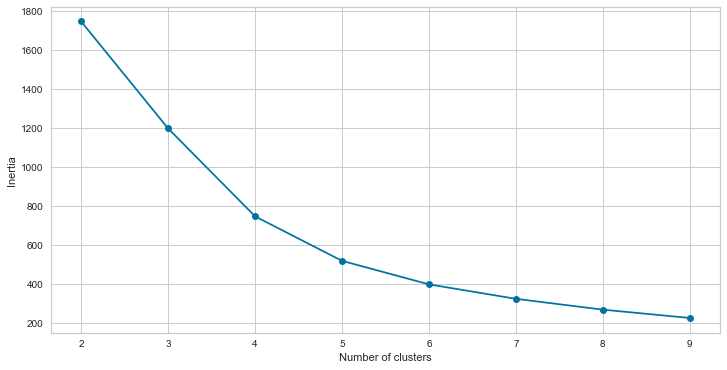

In [31]:
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### KMeans with 4 clusters

In [33]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 23.04it/s]


In [34]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    silhouette[i] = silhouette_score(X, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 20.77it/s]


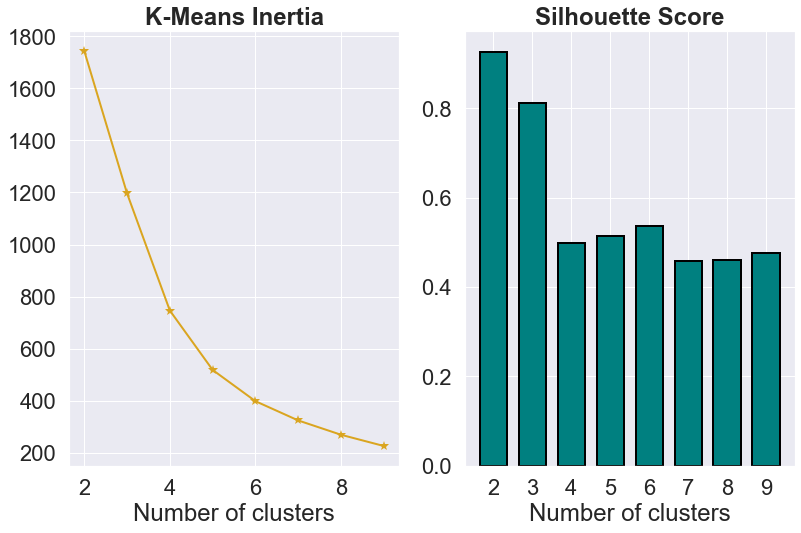

In [35]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="goldenrod", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="teal" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

In [41]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

C:\Users\spana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


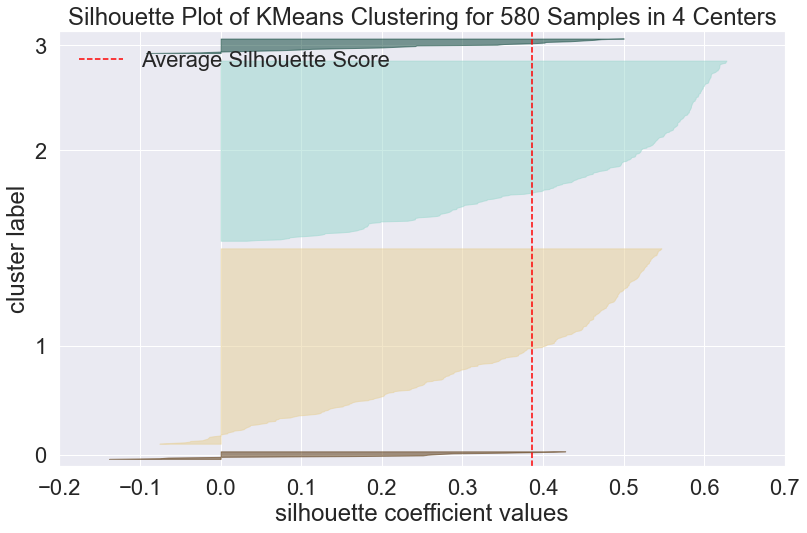

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 580 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
model = kmeans
visualizer = SilhouetteVisualizer(model, colors='BrBG')

visualizer.fit(X)        # Fit the data to the visualizer
graph = visualizer.poof()# Draw/show/poof the data
graph

In [39]:
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    284
2    262
3     22
0     12
Name: cluster, dtype: int64

#### Create DataFrame with the clusters

In [40]:
y = kmeans.labels_
y_df = pd.DataFrame(y)
y_df.rename({0: 'cluster'}, axis=1, inplace=True)
y_df

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
575,1
576,1
577,1
578,1


#### Merge the initial DataFrame with clusters

In [41]:
pad_cluster_df = pd.concat([new, y_df], axis=1)

In [42]:
pad_cluster_df

,market_cap,price_change_percentage_24h,twitter_followers,circ_perc,cluster
0,7.855696e+10,0.30402,194717,100.000000,0
1,4.426681e+10,4.71225,1267322,61.351900,0
2,4.422145e+10,0.48121,0,99.999751,0
3,3.963832e+10,8.39128,786483,71.258646,0
4,3.643655e+10,4.03631,2355535,47.577198,0
...,...,...,...,...,...
575,5.944421e+07,10.01371,78392,59.728209,1
576,5.931584e+07,1.09917,105895,58.300000,1
577,5.855446e+07,9.80124,182,47.767188,1
578,5.842544e+07,-1.43055,39318,0.000000,1


In [43]:
'''check average values per cluster, groupby'''
pad_group_df = pad_cluster_df
pad_group_df = pad_group_df.groupby('cluster').mean()

# '''remove ID column'''
# pad_group_df = pad_group_df.drop(columns = ["ID"])

'''remove index column'''
#pad_group_df = pad_group_df.drop(columns = ["index"])

'''flatten 0'''
pad_group_df = pad_group_df.reset_index()
pad_group_df.head()

,cluster,market_cap,price_change_percentage_24h,twitter_followers,circ_perc
0,0,3.218790e+10,5.962001,1.214561e+06,74.006126
1,1,5.740022e+08,4.689372,1.347184e+05,31.833893
2,2,1.054276e+09,3.972786,1.204982e+05,90.300854
3,3,5.749832e+08,30.245445,4.886414e+04,61.375141


In [45]:
a['clusters'] = kmeans.labels_
a

,id,name,market_cap,price_change_percentage_24h,twitter_followers,circ_perc,clusters
0,tether,Tether,7.855696e+10,0.30402,194717,100.000000,0
1,solana,Solana,4.426681e+10,4.71225,1267322,61.351900,0
2,usd-coin,USD Coin,4.422145e+10,0.48121,0,99.999751,0
3,cardano,Cardano,3.963832e+10,8.39128,786483,71.258646,0
4,ripple,XRP,3.643655e+10,4.03631,2355535,47.577198,0
...,...,...,...,...,...,...,...
575,zcoin,Firo,5.944421e+07,10.01371,78392,59.728209,1
576,hoo-token,Hoo Token,5.931584e+07,1.09917,105895,58.300000,1
577,gm,GM,5.855446e+07,9.80124,182,47.767188,1
578,bytecoin,Bytecoin,5.842544e+07,-1.43055,39318,0.000000,1


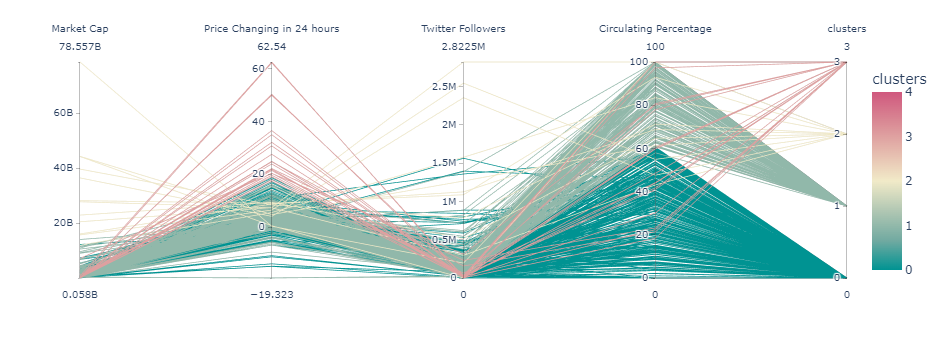

In [66]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(a, color="clusters", labels={"market_cap": "Market Cap",
                "price_change_percentage_24h": "Price Changing in 24 hours", "twitter_followers": "Twitter Followers",
                "circ_perc": "Circulating Percentage"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()